# задание 1

In [ ]:
from numpy import loadtxt
import numpy as np
from keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from tensorflow.python.keras import Input
import tensorflow as tf
import pandas as pd

In [ ]:
df = pd.read_csv('classification_preprocessed.csv')

In [ ]:
X = df.iloc[:, :-1].values
y = df["romantic_"]
del df["Unnamed: 0"]
del df["guardian"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          395 non-null    int64
 1   Medu         395 non-null    int64
 2   Fedu         395 non-null    int64
 3   traveltime   395 non-null    int64
 4   studytime    395 non-null    int64
 5   failures     395 non-null    int64
 6   famrel       395 non-null    int64
 7   freetime     395 non-null    int64
 8   goout        395 non-null    int64
 9   Dalc         395 non-null    int64
 10  Walc         395 non-null    int64
 11  health       395 non-null    int64
 12  absences     395 non-null    int64
 13  G1           395 non-null    int64
 14  G2           395 non-null    int64
 15  G3           395 non-null    int64
 16  school_      395 non-null    int64
 17  sex_         395 non-null    int64
 18  address_     395 non-null    int64
 19  famsize_     395 non-null    int64
 20  Pstatus_  

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                1056      
                                                                 
Total params: 1,056
Trainable params: 1,056
Non-trainable params: 0
_________________________________________________________________
None


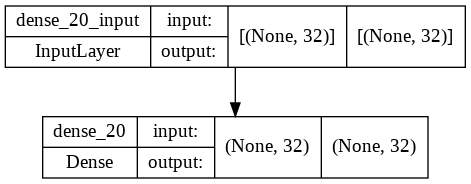

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# обучение keras модели
model.fit(X_train, y_train, epochs=150, batch_size=10)

ValueError: ignored

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
predictions = (model.predict(X) > 0.5).astype(int)
for i in range(5):
  print(X_train[i].tolist(), predictions[i], '=> (expected',y[i],')')

In [ ]:
model.save('my_model')

In [ ]:
from tensorflow import keras
reconstructed_model = keras.models.load_model("my_model")

In [ ]:
predictions = (reconstructed_model.predict(X) > 0.5).astype(int)
for i in range(5):
  print(X_train[i].tolist(), predictions[i], '=> (expected',y[i],')')

# 2-ое задание


https://www.tensorflow.org/tutorials/images/classification

In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random

In [ ]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip CatsVsDogs.zip #распаковываем архив

Archive:  CatsVsDogs.zip
replace Cats_vs_Dogs/CDLA-Permissive-2.0.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls PetImages

Cat  Dog


In [ ]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 65 images


In [ ]:
image_size = (80, 80)
batch_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1450,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1450,
    image_size=image_size,
    batch_size=batch_size,
)

Found 937 files belonging to 2 classes.
Using 750 files for training.
Found 937 files belonging to 2 classes.
Using 187 files for validation.


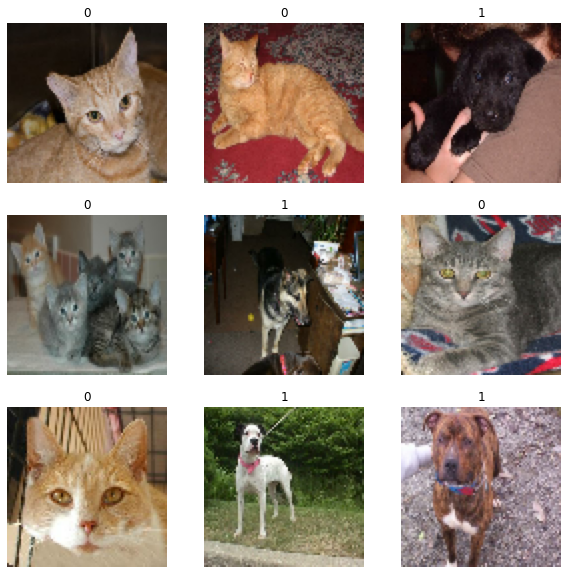

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

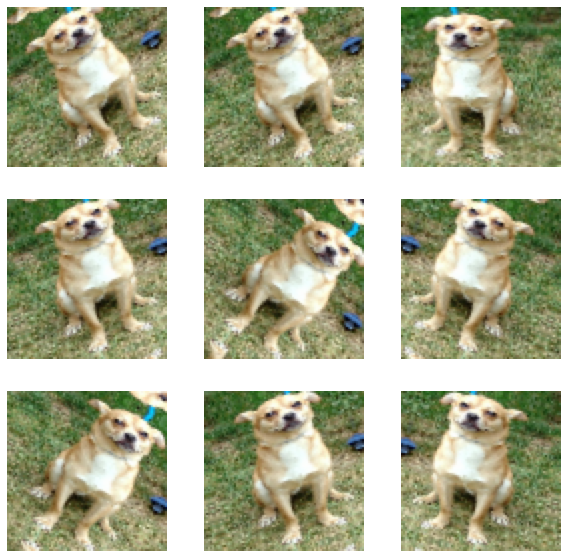

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("sigmoid")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("sigmoid")(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units = 1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

In [ ]:
model = make_model(input_shape=image_size + (3,), num_classes=2)

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)

Epoch 1/25
12/12 [==============================] - 35s 3s/step - loss: 0.7273 - accuracy: 0.5800 - val_loss: 0.7022 - val_accuracy: 0.5027
Epoch 2/25
12/12 [==============================] - 20s 2s/step - loss: 0.6734 - accuracy: 0.6040 - val_loss: 0.7201 - val_accuracy: 0.4973
Epoch 3/25
12/12 [==============================] - 27s 2s/step - loss: 0.6996 - accuracy: 0.5907 - val_loss: 0.6953 - val_accuracy: 0.5027
Epoch 4/25
12/12 [==============================] - 30s 3s/step - loss: 0.6934 - accuracy: 0.6067 - val_loss: 0.6941 - val_accuracy: 0.5027
Epoch 5/25
12/12 [==============================] - 22s 2s/step - loss: 0.6431 - accuracy: 0.6507 - val_loss: 0.6964 - val_accuracy: 0.4973
Epoch 6/25
12/12 [==============================] - 20s 2s/step - loss: 0.6449 - accuracy: 0.6213 - val_loss: 0.6977 - val_accuracy: 0.5027
Epoch 7/25
12/12 [==============================] - 20s 2s/step - loss: 0.6391 - accuracy: 0.6560 - val_loss: 0.6929 - val_accuracy: 0.5027
Epoch 8/25
12/12 [==

In [ ]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/42.jpg", target_size=image_size
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
print(predictions)
score = predictions[0]
print(" %.2f  - кошка; %.2f - собака." % (100 * (1 - score), 100 * score))

[[0.15795732]]
 84.20  - кошка; 15.80 - собака.
